#### Problem Statement
The goal is to predict diabetes progression for each individual year using BMI as an independent variable. The objective is to develop a model which predict accurately the target varibles based on the BMI features. In this particular instance we are using polynomial regression technique. 

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#importing and loading the diabetes dataset from sklearn library
diabetes = datasets.load_diabetes()

In [3]:
#Loading and coverting the data
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
#summary of the central tendency, dispersion and the shape of the data.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


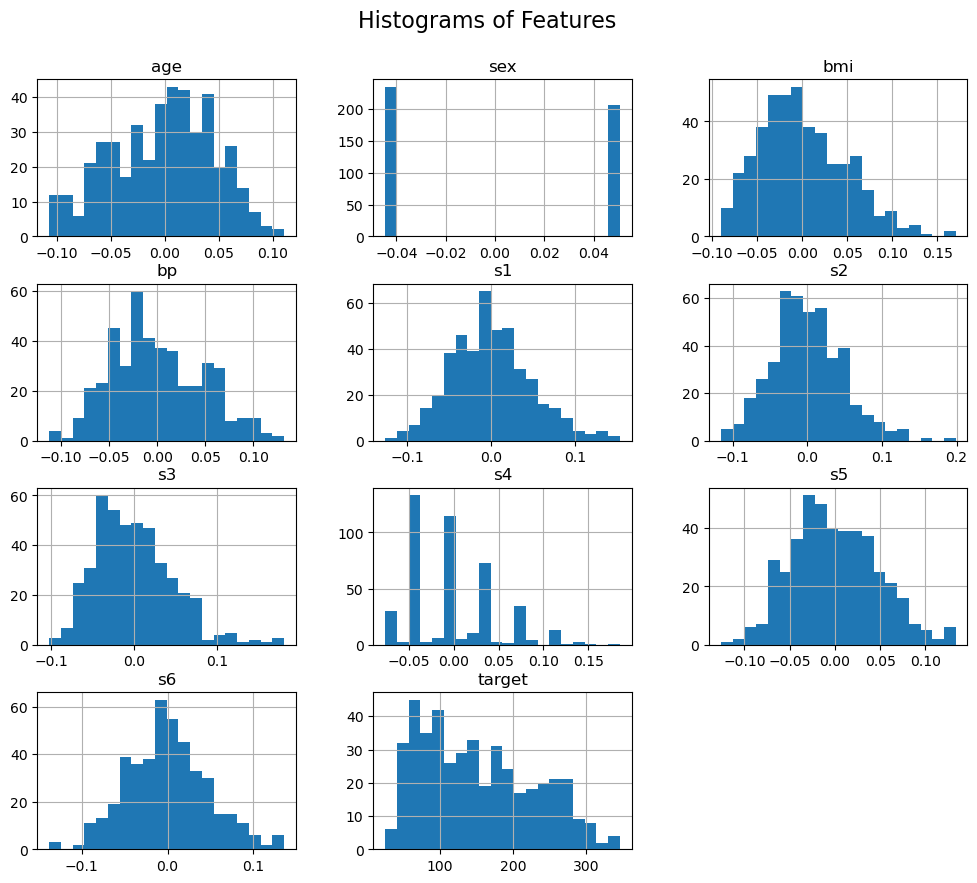

In [5]:
#Histogram of the data
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Features", y=0.95, fontsize=16)
plt.show()

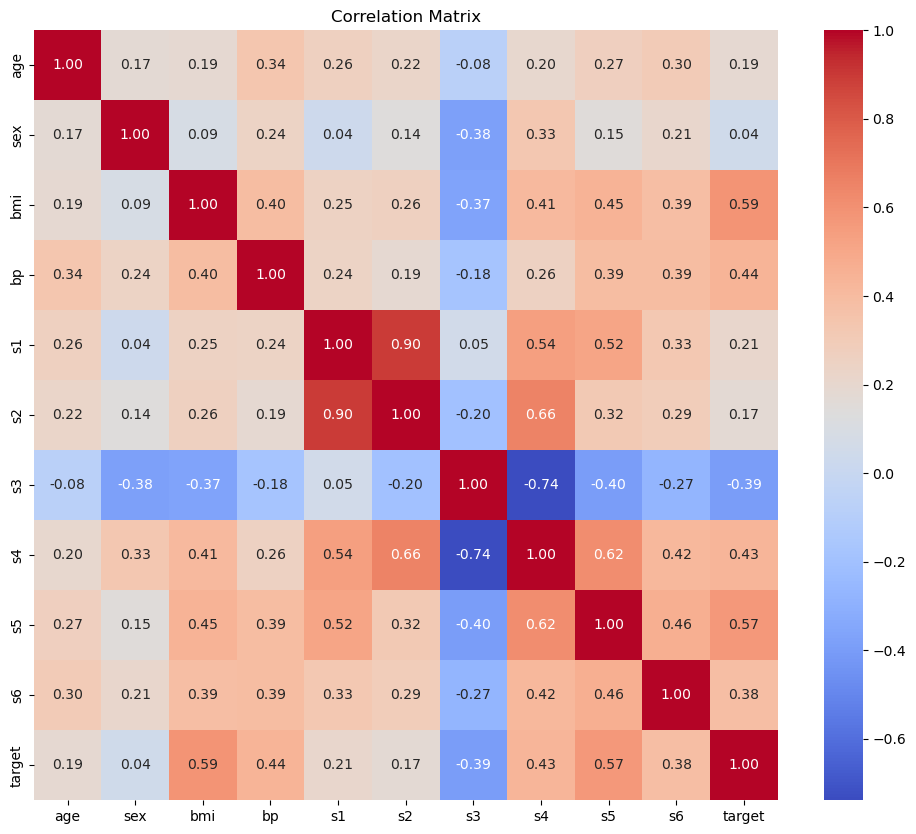

In [6]:
#correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The above graph mostly suggest that the model has mostly positive correlation among the variables, with some instances of strong negative or negative correlation between them 
For examples
1. Between S3 and S4 (Strong Negative Correlation)
2. Between age and S3 (Negative Correlation)

In [7]:
#Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [8]:
#dropping if any missing values exist
df.dropna(inplace=True)

Since the dataset is a part of scikit-learn library, it is already clean.

In [9]:
#splitting the data into train(70%), validation(15%), and test(15%)
# Split the Dataset
X = df[['bmi']]
y = df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
#polynomial regression models from degree 0 to 5:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

degrees = range(6)
results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_train = model.predict(X_poly_train)
    y_pred_val = model.predict(X_poly_val)

    r2 = r2_score(y_val, y_pred_val)
    mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
    mae = mean_absolute_error(y_val, y_pred_val)

    results.append((degree, r2, mape, mae))

# Print results
for result in results:
    print(f"Degree {result[0]} - R-squared: {result[1]:.4f}, MAPE: {result[2]:.4f}%, MAE: {result[3]:.4f}")


Degree 0 - R-squared: -0.0081, MAPE: 57.9577%, MAE: 62.0430
Degree 1 - R-squared: 0.3025, MAPE: 42.0456%, MAE: 48.2707
Degree 2 - R-squared: 0.2962, MAPE: 41.9024%, MAE: 48.2730
Degree 3 - R-squared: 0.2970, MAPE: 41.8775%, MAE: 48.2351
Degree 4 - R-squared: 0.2632, MAPE: 41.4836%, MAE: 48.3674
Degree 5 - R-squared: 0.2976, MAPE: 40.7376%, MAE: 47.3489


In [11]:
#Checking the best model using the test set:
best_degree = 2
poly_features = PolynomialFeatures(degree=best_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred_test = model.predict(X_poly_test)

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Test set - R-squared: {r2_test:.4f}, MAE: {mae_test:.4f}, MSE: {mse_test:.4f}")



Test set - R-squared: 0.2591, MAE: 53.0849, MSE: 4206.9993


C:\Users\techv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


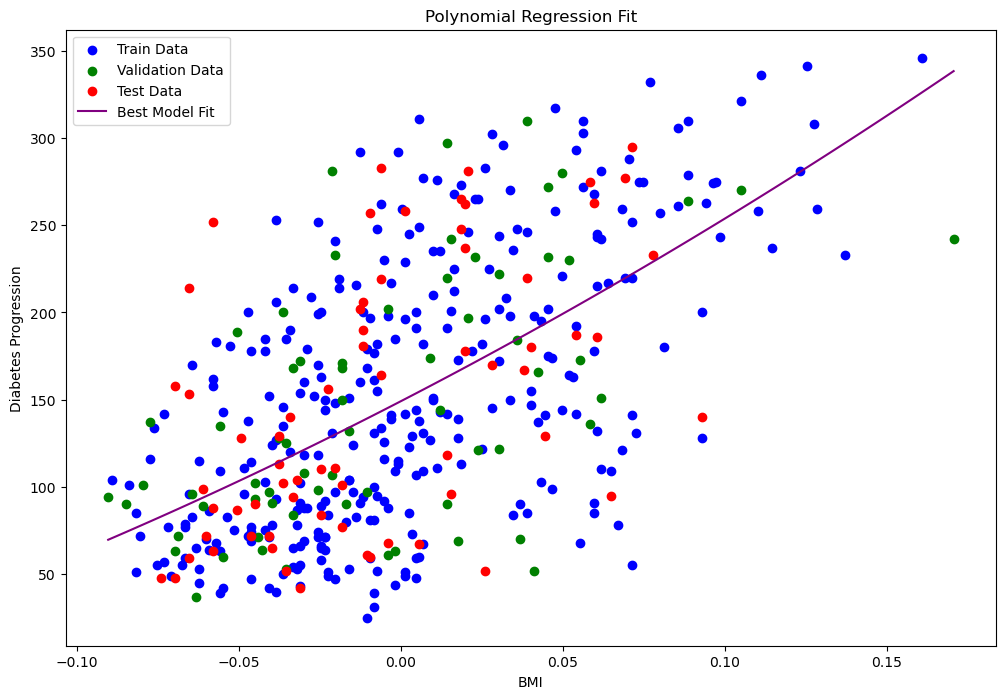

In [12]:
#Visualization
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, label='Train Data', color='blue')

# Plot validation data
plt.scatter(X_val, y_val, label='Validation Data', color='green')

# Plot test data
plt.scatter(X_test, y_test, label='Test Data', color='red')

# Plot the best model fit
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = model.predict(X_fit_poly)

plt.plot(X_fit, y_fit, label='Best Model Fit', color='purple')

plt.title('Polynomial Regression Fit')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

In [13]:
coefficients = model.coef_
intercept = model.intercept_

equation = f"y = {intercept:.2f} + {coefficients[1]:.2f} * x + {coefficients[2]:.2f} * x^2"
print(equation)

y = 149.09 + 959.15 * x + 881.83 * x^2


In [14]:
# Replace with your chosen BMI value
chosen_bmi = 25

# Manual Calculation
manual_prediction = intercept + coefficients[1] * chosen_bmi + coefficients[2] * chosen_bmi**2

# Model Prediction
X_chosen_bmi = np.array([[chosen_bmi]])
X_chosen_bmi_poly = poly_features.transform(X_chosen_bmi)
model_prediction = model.predict(X_chosen_bmi_poly)[0]

print(f"Manual Prediction: {manual_prediction:.2f}, Model Prediction: {model_prediction:.2f}")


Manual Prediction: 575273.46, Model Prediction: 575273.46


C:\Users\techv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [15]:
#number of trainable parameters:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    print(f"Degree {degree}: {X_poly_train.shape[1]} trainable parameters")

Degree 0: 1 trainable parameters
Degree 1: 2 trainable parameters
Degree 2: 3 trainable parameters
Degree 3: 4 trainable parameters
Degree 4: 5 trainable parameters
Degree 5: 6 trainable parameters
